# Кластеризация ЕГЭ (4 если сделаны все задачи)

Рядом лежат данные с координатами точек. Везде используется Евклидово расстояние. Кластером считается набор не менее чем из 30 точек связанных друг с другом. Аномалия это точка находящаяся на расстоянии более 1 от любого кластера.

* Постройте Распределение точек
* Напишите руками DBSCAN и обработайте им все файлы
* Файл 0.xls также решите руками
* Постройте Распределение точек, отметьте принадлежность кластеров цветами
* Отметьте Аномалии отдельным цветом
* Найдите среди в каждом кластере точку расстояние от которой до всех остальных минимально
* Выведите два числа - Среднее абсцисс и ординат центроидов кластеров * 100000

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import dist

### 0 задача

<ipython-input-21-5abb8cd4e2e4>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


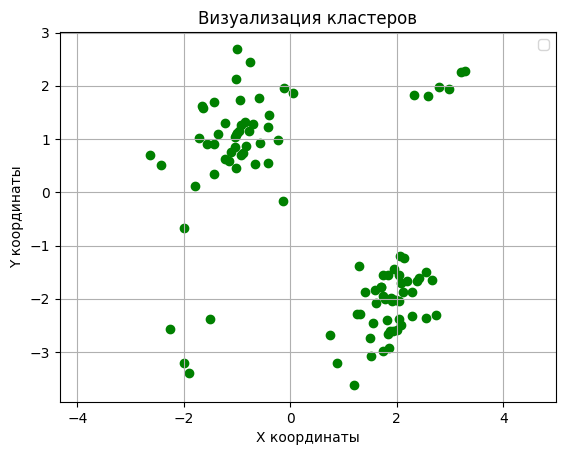

[-1.431691777, 0.905441683] [2.287223094, -2.314738327]
[[[-1.431691777, 0.905441683]], [[2.287223094, -2.314738327]]]
-1.030566552 1.082829348

1.905465993 -2.040851794

43744
-47901


In [21]:
f = open("/content/0.txt")
f.readline()
listst = [list(map(float, i.replace(",",".").split())) for i in f]
x = [i[0] for i in listst]
y = [i[1] for i in listst]
plt.scatter(x,y,color = "Green")
plt.title('Визуализация кластеров')
plt.xlabel('X координаты')
plt.ylabel('Y координаты')
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()
print(listst[0],listst[1]) #Изображение кластеров

# Находим по одной точке в файле, принадлежащей каждому кластеру ручками

cl = [[[listst[0][0], listst[0][1]]], [[listst[1][0], listst[1][1]]]]
print(cl)
listst.pop(1), listst.pop(0)

for k in range(2):
    for star in cl[k]:
        for i in range(len(listst)):
            if listst[i] != "#":
                if dist(listst[i], star) <= 1:
                    cl[k].append(listst[i])
                    listst[i] = "#"

sum_x = sum_y = 0
for i in cl:
    tx = ty = 0
    mx = 1e9  # Максимальное расстояние
    for j in i:  # Перебор предполагаемого перифероида
        sm = 0  # Суммарное расстояние
        for k in i:  # Перебор остальных звёзд для вычисления расстояний
            sm += dist(k, j)
        if sm < mx:
            mx = sm
            tx, ty = j
    sum_x += tx
    sum_y += ty
    print(tx,ty)
    print()

print(int(sum_x / 2 * 100000))
print(int(sum_y / 2 * 100000))

In [22]:
anomx = []
anomy = []
for i in listst:
  if i != "#":
    anomx.append(i[0])
    anomy.append(i[1])

In [24]:
print(cl)

[[[-1.431691777, 0.905441683], [-1.030566552, 1.082829348], [-1.048093137, 0.843880777], [-1.362805926, 1.086654593], [-1.42828936, 1.701960348], [-0.662987696, 0.527068755], [-0.994833442, 1.11411203], [-0.926875093, 1.262485119], [-1.669187082, 1.614608487], [-0.569947686, 0.933085696], [-0.845161409, 1.324614278], [-1.031364265, 1.044024535], [-1.222226108, 0.620841685], [-1.114952059, 0.758256263], [-1.708674105, 1.015933942], [-1.151429774, 0.594327938], [-0.83303533, 0.871036419], [-1.5612759, 0.903329773], [-0.950473154, 1.740694213], [-1.428280137, 0.34211093], [-0.711080606, 1.274543604], [-1.796755528, 0.113944759], [-0.971890198, 1.143519222], [-0.934113593, 0.692294302], [-0.885815113, 0.735836769], [-1.228731559, 1.304523976], [-0.769505094, 1.155228542], [-1.640147412, 1.586526429], [-1.025938095, 0.452327661], [-0.592518372, 1.771413563], [-0.237395832, 0.987052294], [-0.422357132, 1.221247438], [-0.426625727, 0.55871546], [-0.398194166, 1.459930796], [-0.76280494, 2.442

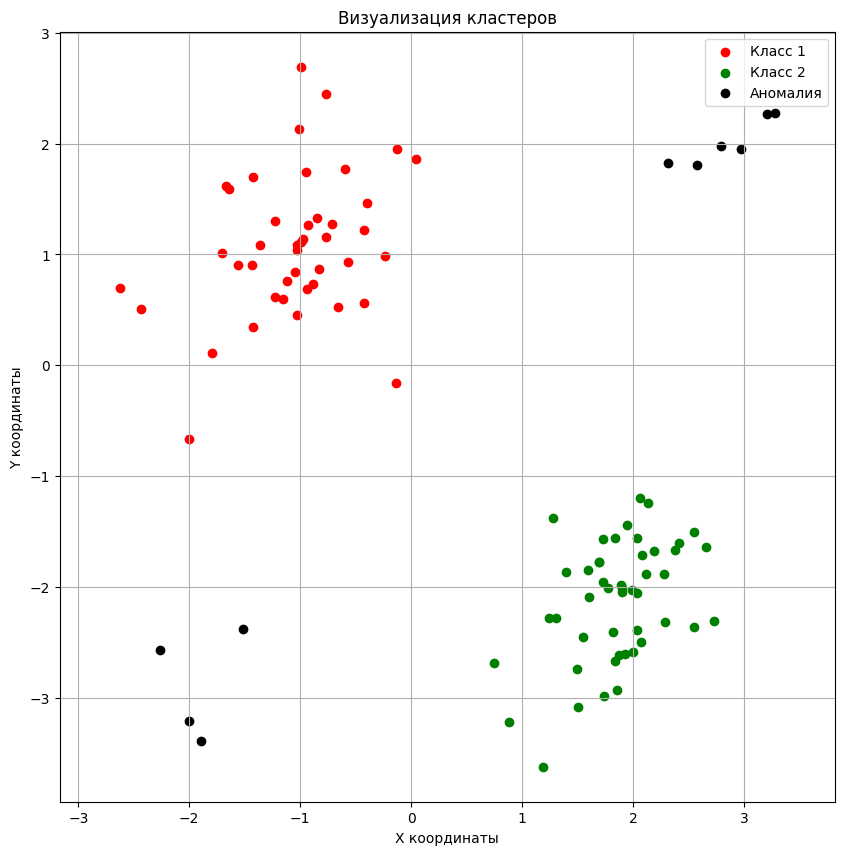

In [25]:
plt.figure(figsize=(10, 10))
x1 = []
y1 = []
x2 = []
y2 = []
for i in range(len(cl[0])):
    x1.append(float(cl[0][i][0]))
    y1.append(float(cl[0][i][1]))
for i in range(len(cl[1])):
    x2.append(float(cl[1][i][0]))
    y2.append(float(cl[1][i][1]))

plt.scatter(x1, y1, color='red', label='Класс 1', alpha=1)
plt.scatter(x2, y2, color='green', label='Класс 2', alpha=1)
plt.scatter(anomx, anomy, color='black', label='Аномалия', alpha=1)


plt.title('Визуализация кластеров')
plt.xlabel('X координаты')
plt.ylabel('Y координаты')
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()

### 1 задача

<ipython-input-26-6b7a660759f5>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


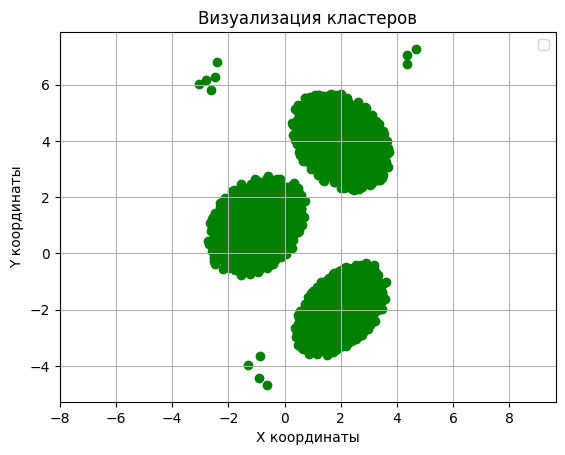

1.997911354 -1.999164258
2.001614639 3.998194512
-1.002671154 1.003715398
99895.1613 100091.52173333333


In [26]:
f = open("/content/1.txt")
f.readline()
listst = [list(map(float, i.replace(",",".").split())) for i in f.readlines()]
x = [i[0] for i in listst]
y = [i[1] for i in listst]
plt.scatter(x,y,color = "Green")
plt.title('Визуализация кластеров')
plt.xlabel('X координаты')
plt.ylabel('Y координаты')
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()
cl = [[[listst[0][0],listst[0][1]]], [[listst[1][0],listst[1][1]]], [[listst[3][0],listst[3][1]]]]
listst.pop(3), listst.pop(1), listst.pop(0)
for k in range(3):
  for star in cl[k]:
    for i in range(len(listst)):
      if listst[i] != "*":
        if dist(listst[i], star) <= 0.6:
          cl[k].append(listst[i])
          listst[i] = "*"
sx = sy = 0
for k in cl:
  max = 10000050000
  tx = ty =0
  for j in (k):
    dis = 0
    for i in k:
      dis += dist(j,i)
    if(dis<max):
      tx = j[0]
      ty = j[1]
      max = dis
  print(tx,ty)
  sx += tx
  sy += ty
print((sx/3)*100000, (sy/3)*100000)

In [27]:
print(cl[0])
print(cl[1])
print(cl[2])

[[1.927495918, -2.247685735], [2.171377048, -2.24369567], [1.932648418, -2.045460867], [1.74831059, -2.066327391], [1.982420588, -2.034405776], [2.000316041, -1.999796378], [1.911638229, -1.827627239], [2.137703956, -2.294184071], [1.661820396, -1.981313782], [2.184802847, -2.156899443], [1.999526548, -1.984765175], [1.886777196, -2.275870427], [1.787362636, -2.206072721], [2.124630507, -2.40616013], [1.99688509, -1.99719046], [1.639390351, -2.197287806], [1.846072312, -2.338632132], [2.440563756, -2.374789459], [2.033486427, -2.147304405], [1.839496078, -2.481470789], [1.619814963, -1.851728265], [2.510999261, -2.117437442], [1.566370121, -2.126820611], [2.119508036, -1.966508165], [1.628251562, -2.663922056], [2.009267551, -2.005280448], [2.067570612, -1.984204776], [1.588601873, -2.254510763], [1.848077594, -1.987335872], [1.956646535, -2.423992968], [1.868823955, -1.934220729], [1.477216042, -1.89832363], [2.056026024, -2.016704215], [2.162960058, -1.715205688], [1.993409348, -2.05

In [28]:
ax = []
ay = []
for i in listst:
  if i != "*":
    ax.append(i[0])
    ay.append(i[1])

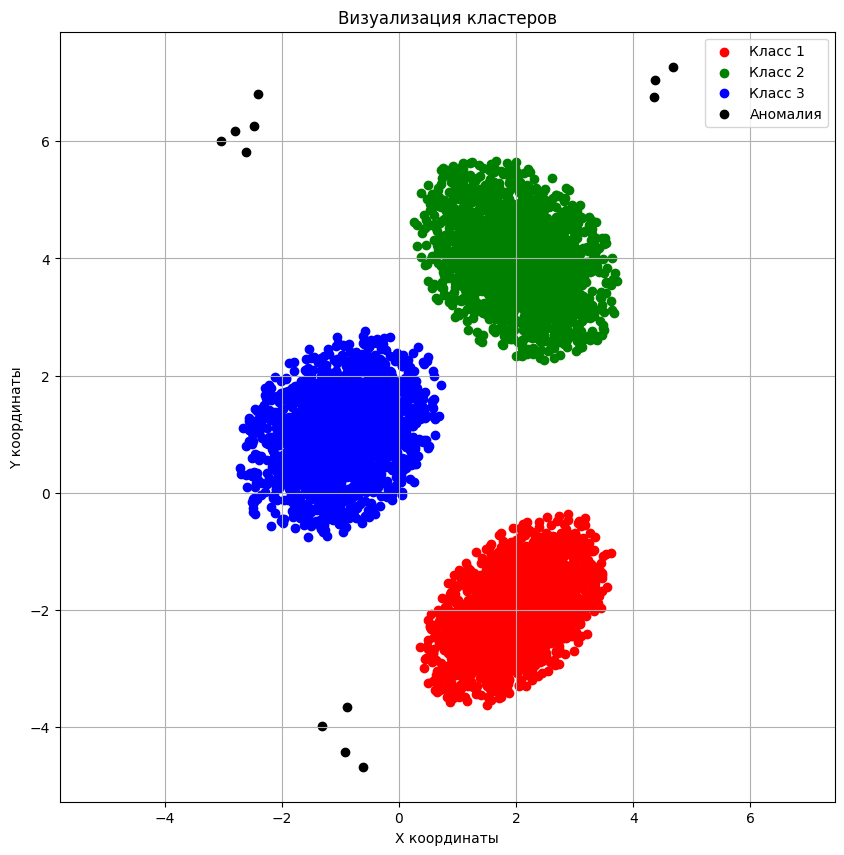

In [29]:
plt.figure(figsize=(10, 10))
x1 = []
y1 = []
x2 = []
y2 = []
y3 = []
x3 = []
for i in range(len(cl[0])):
    x1.append(float(cl[0][i][0]))
    y1.append(float(cl[0][i][1]))
for i in range(len(cl[1])):
    x2.append(float(cl[1][i][0]))
    y2.append(float(cl[1][i][1]))
for i in range(len(cl[2])):
    x3.append(float(cl[2][i][0]))
    y3.append(float(cl[2][i][1]))

plt.scatter(x1, y1, color='red', label='Класс 1', alpha=1)
plt.scatter(x2, y2, color='green', label='Класс 2', alpha=1)
plt.scatter(x3, y3, color='blue', label='Класс 3', alpha=1)
plt.scatter(ax, ay, color='black', label='Аномалия', alpha=1)

plt.title('Визуализация кластеров')
plt.xlabel('X координаты')
plt.ylabel('Y координаты')
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()

### 2 задача

<ipython-input-30-eda37473d29c>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


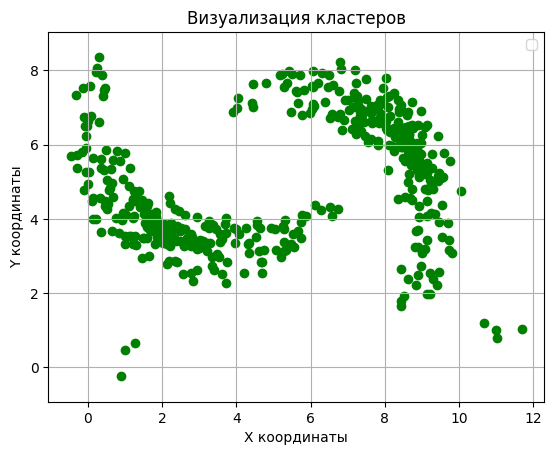

In [30]:
f = open("/content/2.txt")
f.readline()
listst = [list(map(float, i.split(","))) for i in f.readlines()]
x = [i[0] for i in listst]
y = [i[1] for i in listst]
plt.scatter(x,y,color = "Green")
plt.title('Визуализация кластеров')
plt.xlabel('X координаты')
plt.ylabel('Y координаты')
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()

In [32]:
cl = [[[listst[0][0],listst[1][0]]], [[listst[1][0],listst[1][1]]]]
listst.pop(0)
listst.pop(0)
for k in range(2):
  for star in cl[k]:
    for i in range(len(listst)):
      if(listst[i]!="*"):
        if(dist(listst[i],star)<1):
          cl[k].append(listst[i])
          listst[i] = "*"
sx = sy = 0
for k in range(2):
  mx = 10000000000
  tx=ty = 0
  for i in cl[k]:
    dis = 0
    for j in cl[k]:
      dis += dist(i,j)
    if(dis<mx):
      mx = dis
      tx = i[0]
      ty = i[1]
  print(tx,ty)
  sx += tx
  sy += ty
print((sx/2)*100000,(sy/2)*100000)

8.279901088686108 6.194730492566545
2.0387619757963513 3.7850114170985236
515933.15322412294 498987.0954832535


In [33]:
ax = []
ay = []
for i in listst:
  if i != "*":
    ax.append(i[0])
    ay.append(i[1])

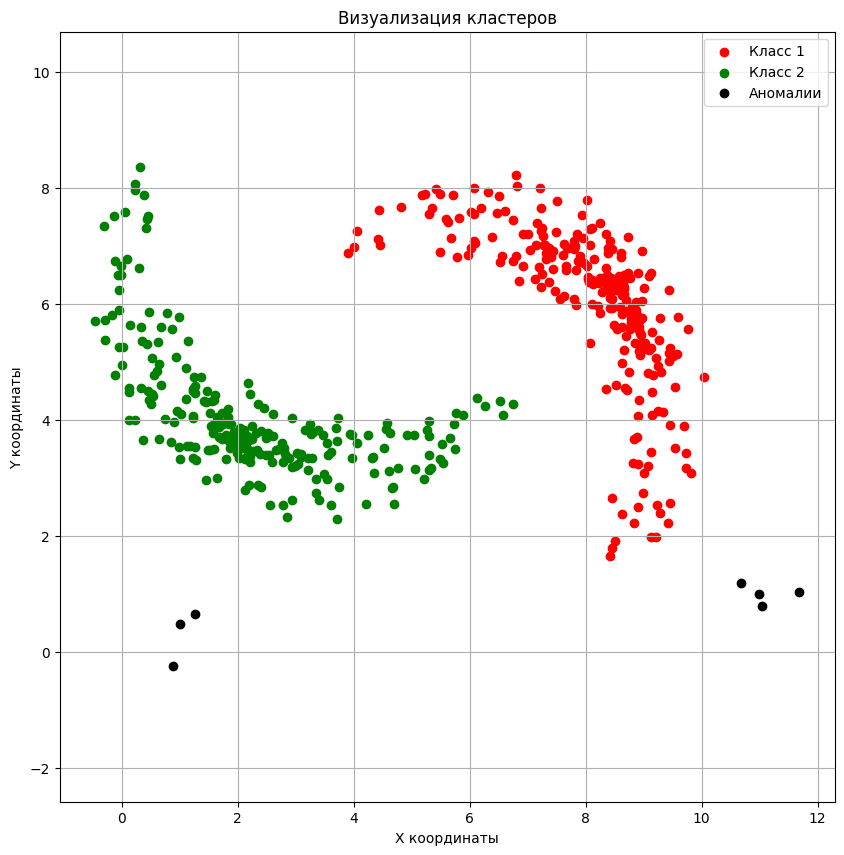

In [34]:
plt.figure(figsize=(10, 10))
x1 = []
y1 = []
x2 = []
y2 = []
for i in range(len(cl[0])):
    x1.append(float(cl[0][i][0]))
    y1.append(float(cl[0][i][1]))
for i in range(len(cl[1])):
    x2.append(float(cl[1][i][0]))
    y2.append(float(cl[1][i][1]))

plt.scatter(x1, y1, color='red', label='Класс 1', alpha=1)
plt.scatter(x2, y2, color='green', label='Класс 2', alpha=1)
plt.scatter(ax, ay, color='black', label='Аномалии', alpha=1)

plt.title('Визуализация кластеров')
plt.xlabel('X координаты')
plt.ylabel('Y координаты')
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()

### 3 задача

<ipython-input-35-b692e5ff875a>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


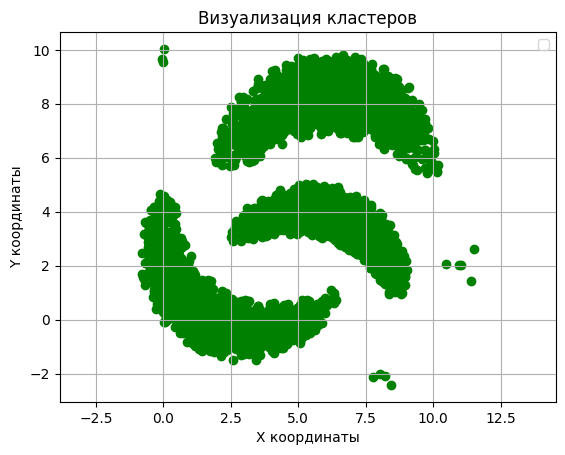

In [35]:
f = open("/content/3.txt")
f.readline()
listst = [list(map(float, i.split(","))) for i in f.readlines()]
x = [i[0] for i in listst]
y = [i[1] for i in listst]
plt.scatter(x,y,color = "Green")
plt.title('Визуализация кластеров')
plt.xlabel('X координаты')
plt.ylabel('Y координаты')
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()

In [37]:
cl = [[[listst[0][0],listst[0][1]]], [[listst[2][0], listst[2][1]]], [[listst[4][0], listst[4][1]]]]
listst.pop(4), listst.pop(2), listst.pop(0)
for k in range(3):
  for star in cl[k]:
    for i in range(len(listst)):
      if(listst[i]!="*"):
        if(dist(listst[i],star)<1):
          cl[k].append(listst[i])
          listst[i] = "*"

sx = sy = 0
for k in range(3):
  mx = 1000000000
  tx=ty=0
  for i in cl[k]:
    dis = 0
    for j in cl[k]:
      dis += dist(i,j)
    if(mx>dis):
      mx = dis
      tx = i[0]
      ty = i[1]
  print(tx,ty)
  sx += tx
  sy += ty
print((sx/3) * 100000, (sy/ 3) * 100000)

6.0972760336772325 8.290449940374414
1.696151015672141 0.12926250793867355
6.338891180086092 3.8563329929926073
471077.2743145156 409201.5147101898


In [38]:
ax = []
ay = []
for i in listst:
  if i != "*":
    ax.append(i[0])
    ay.append(i[1])

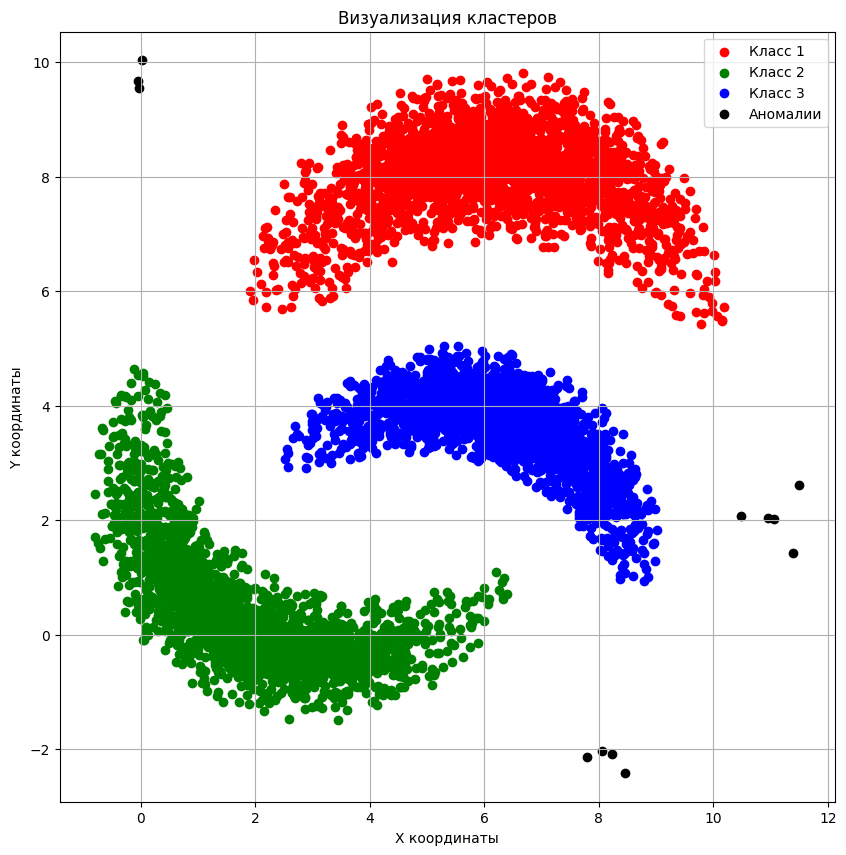

In [39]:
plt.figure(figsize=(10, 10))
x1 = []
y1 = []
x2 = []
y2 = []
y3 = []
x3 = []
for i in range(len(cl[0])):
    x1.append(float(cl[0][i][0]))
    y1.append(float(cl[0][i][1]))
for i in range(len(cl[1])):
    x2.append(float(cl[1][i][0]))
    y2.append(float(cl[1][i][1]))
for i in range(len(cl[2])):
    x3.append(float(cl[2][i][0]))
    y3.append(float(cl[2][i][1]))

plt.scatter(x1, y1, color='red', label='Класс 1', alpha=1)
plt.scatter(x2, y2, color='green', label='Класс 2', alpha=1)
plt.scatter(x3, y3, color='blue', label='Класс 3', alpha=1)
plt.scatter(ax, ay, color='black', label='Аномалии', alpha=1)

plt.title('Визуализация кластеров')
plt.xlabel('X координаты')
plt.ylabel('Y координаты')
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()

### 4 задача

<ipython-input-47-9a97d93ea2e1>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


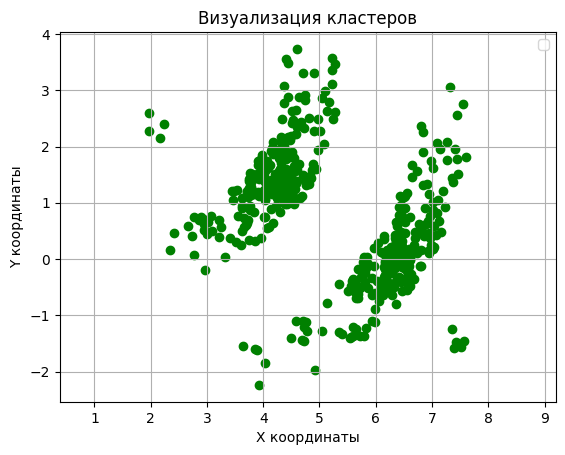

In [47]:
f = open("/content/4.txt")
listst = [list(map(float, i.split(","))) for i in f.readlines()]
x = [i[0] for i in listst]
y = [i[1] for i in listst]
plt.scatter(x,y,color = "Green")
plt.title('Визуализация кластеров')
plt.xlabel('X координаты')
plt.ylabel('Y координаты')
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()

In [48]:
cl = [[[listst[0][0],listst[0][1]]], [[listst[1][0], listst[1][1]]]]
listst.pop(1), listst.pop(0)
for k in range(2):
  for star in cl[k]:
    for i in range(len(listst)):
      if(listst[i]!="*"):
        if(dist(listst[i],star)<1):
          cl[k].append(listst[i])
          listst[i] = "*"

sx = sy = 0
for k in range(2):
  mx = 1000000000
  tx=ty=0
  for i in cl[k]:
    dis = 0
    for j in cl[k]:
      dis += dist(i,j)
    if(mx>dis):
      mx = dis
      tx = i[0]
      ty = i[1]
  print(tx,ty)
  sx += tx
  sy += ty
print((sx/2) * 100000, (sy/ 2) * 100000)

4.244769949421723 1.4314581166536477
6.3167022108860245 0.004171004482220297
528073.6080153874 71781.45605679341


In [49]:
ax = []
ay = []
for i in listst:
  if i != "*":
    ax.append(i[0])
    ay.append(i[1])

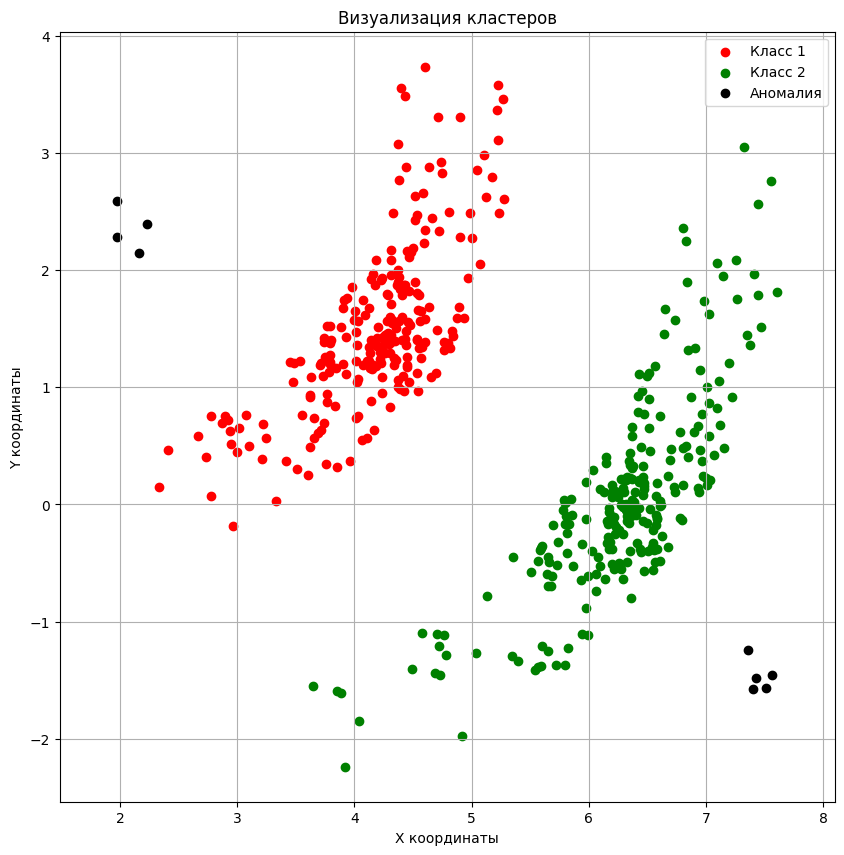

In [50]:
plt.figure(figsize=(10, 10))
x1 = []
y1 = []
x2 = []
y2 = []
for i in range(len(cl[0])):
    x1.append(float(cl[0][i][0]))
    y1.append(float(cl[0][i][1]))
for i in range(len(cl[1])):
    x2.append(float(cl[1][i][0]))
    y2.append(float(cl[1][i][1]))

plt.scatter(x1, y1, color='red', label='Класс 1', alpha=1)
plt.scatter(x2, y2, color='green', label='Класс 2', alpha=1)
plt.scatter(ax, ay, color='black', label='Аномалия', alpha=1)

plt.title('Визуализация кластеров')
plt.xlabel('X координаты')
plt.ylabel('Y координаты')
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()

### 5 задача

<ipython-input-59-8b14edae0509>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


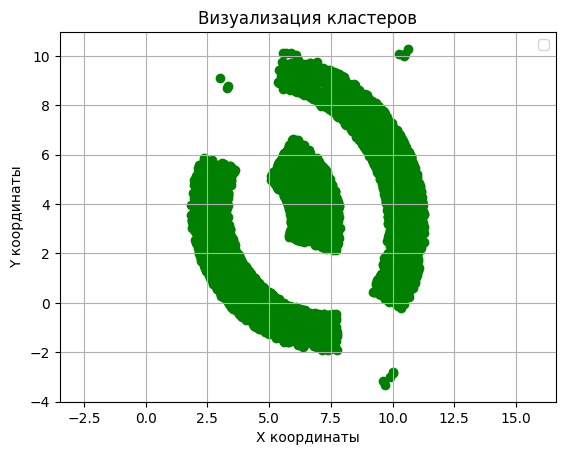

In [59]:
f = open("/content/5.txt")
listst = [list(map(float, i.split(","))) for i in f.readlines()]
x = [i[0] for i in listst]
y = [i[1] for i in listst]
plt.scatter(x,y,color = "Green")
plt.title('Визуализация кластеров')
plt.xlabel('X координаты')
plt.ylabel('Y координаты')
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()

In [52]:
print(listst)

[[7.12174718513091, 2.947975814931568], [4.216153613532527, 0.7409192983570715], [5.844846169918614, 2.854216706876828], [9.906416257280558, 6.189253125224514], [5.670448250890671, 4.76953895130312], [9.819829777158514, 5.135322522506984], [2.2082117585506786, 3.1076928968284365], [10.217056483997174, 3.2106037050874434], [3.2130574544630304, 1.1549229752758283], [3.585781636617204, 0.8873163911298956], [9.8741800274392, 6.1532242815454365], [7.462641490154151, 2.3901107743707906], [5.505733549042317, 5.7121122238691235], [11.104398388095602, 2.7177307896587615], [2.756985357367048, 5.309011173142634], [6.770464335706805, 4.605349347264227], [6.800420511411998, 4.368487862298116], [4.2066350162807895, 0.8004574135592133], [5.157855487778921, 5.3064085605858615], [9.076682440484316, 6.832685885235904], [9.69836199812257, 5.9466866072100055], [9.842610802570412, 5.866713327416741], [6.63858581690465, 4.320073088534631], [9.251720847564872, 6.464291056057102], [8.931601823452109, 7.499587

In [60]:
cl = [[[listst[0][0],listst[0][1]]], [[listst[1][0], listst[1][1]]], [[listst[3][0], listst[3][1]]]]
listst.pop(3), listst.pop(1), listst.pop(0)
print(cl)
for k in range(3):
  for star in cl[k]:
    for i in range(len(listst)):
      if(listst[i]!="*"):
        if(dist(listst[i],star)<1):
          cl[k].append(listst[i])
          listst[i] = "*"

sx = sy = 0
for k in range(3):
  mx = 1000000000
  tx=ty=0
  for i in cl[k]:
    dis = 0
    for j in cl[k]:
      dis += dist(i,j)
    if(mx>dis):
      mx = dis
      tx = i[0]
      ty = i[1]
  print(tx,ty)
  sx += tx
  sy += ty
print((sx/3) * 100000, (sy/ 3) * 100000)

[[[7.12174718513091, 2.947975814931568]], [[4.216153613532527, 0.7409192983570715]], [[9.906416257280558, 6.189253125224514]]]
6.632439176008907 4.29217649571196
3.5836920133304764 0.9997837352964442
9.882268280870775 5.82908406525797
669946.6490070053 370701.4765422124


In [61]:
ax = []
ay = []
for i in listst:
  if i != "*":
    ax.append(i[0])
    ay.append(i[1])

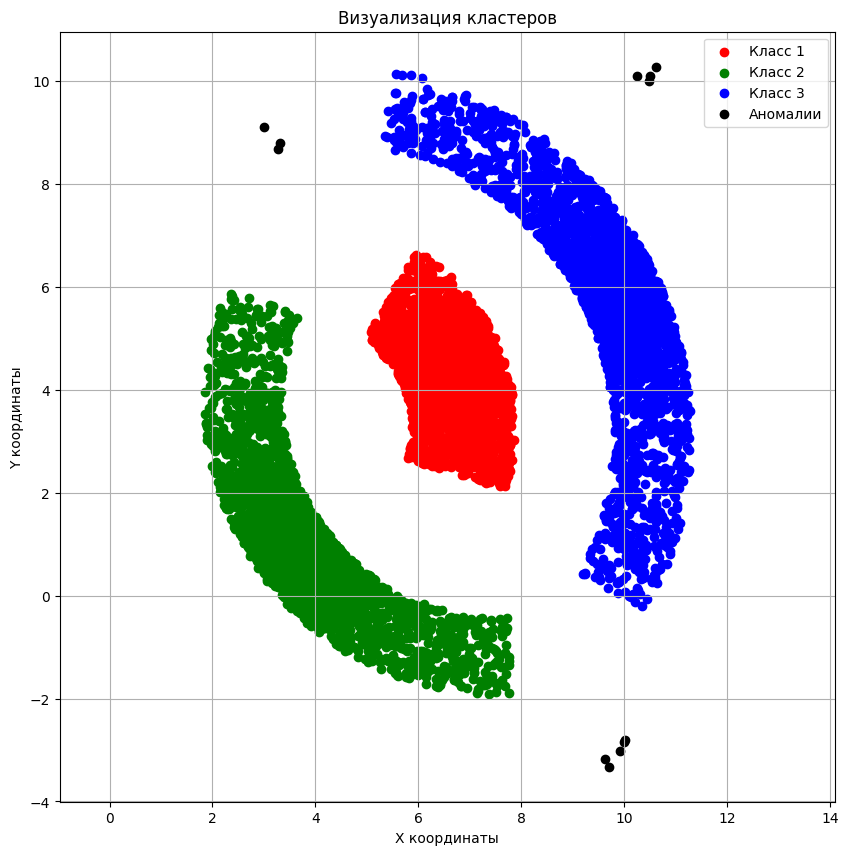

In [62]:
plt.figure(figsize=(10, 10))
x1 = []
y1 = []
x2 = []
y2 = []
y3 = []
x3 = []
for i in range(len(cl[0])):
    x1.append(float(cl[0][i][0]))
    y1.append(float(cl[0][i][1]))
for i in range(len(cl[1])):
    x2.append(float(cl[1][i][0]))
    y2.append(float(cl[1][i][1]))
for i in range(len(cl[2])):
    x3.append(float(cl[2][i][0]))
    y3.append(float(cl[2][i][1]))

plt.scatter(x1, y1, color='red', label='Класс 1', alpha=1)
plt.scatter(x2, y2, color='green', label='Класс 2', alpha=1)
plt.scatter(x3, y3, color='blue', label='Класс 3', alpha=1)
plt.scatter(ax, ay, color='black', label='Аномалии', alpha=1)

plt.title('Визуализация кластеров')
plt.xlabel('X координаты')
plt.ylabel('Y координаты')
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()